In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('BankRecords.csv')

In [3]:
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [4]:
data.drop('ID', axis=1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Experience(Years)      5000 non-null   int64  
 2   Income(Thousands's)    5000 non-null   int64  
 3   Sort Code              5000 non-null   int64  
 4   Family                 5000 non-null   int64  
 5   Credit Score           5000 non-null   float64
 6   Education              5000 non-null   object 
 7   Mortgage(Thousands's)  5000 non-null   int64  
 8   Personal Loan          5000 non-null   object 
 9   Securities Account     5000 non-null   object 
 10  CD Account             5000 non-null   object 
 11  Online Banking         5000 non-null   object 
 12  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 507.9+ KB


In [6]:
data.isna().sum()

Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

* No null values.
* Object types to be encoded.

In [7]:
data.describe()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


* Some wrong values in Experience as it cannot be negative in real life.

In [8]:
data.loc[data['Experience(Years)'] < 0, 'Experience(Years)'] = 0

In [9]:
data.replace({'Yes': 1, 'No': 0}, inplace=True)

In [10]:
data = pd.get_dummies(data, columns=['Education'], dtype=int)

In [11]:
data.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Degree,Education_Diploma,Education_Masters
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,1,0
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,1,0
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,1,0
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0


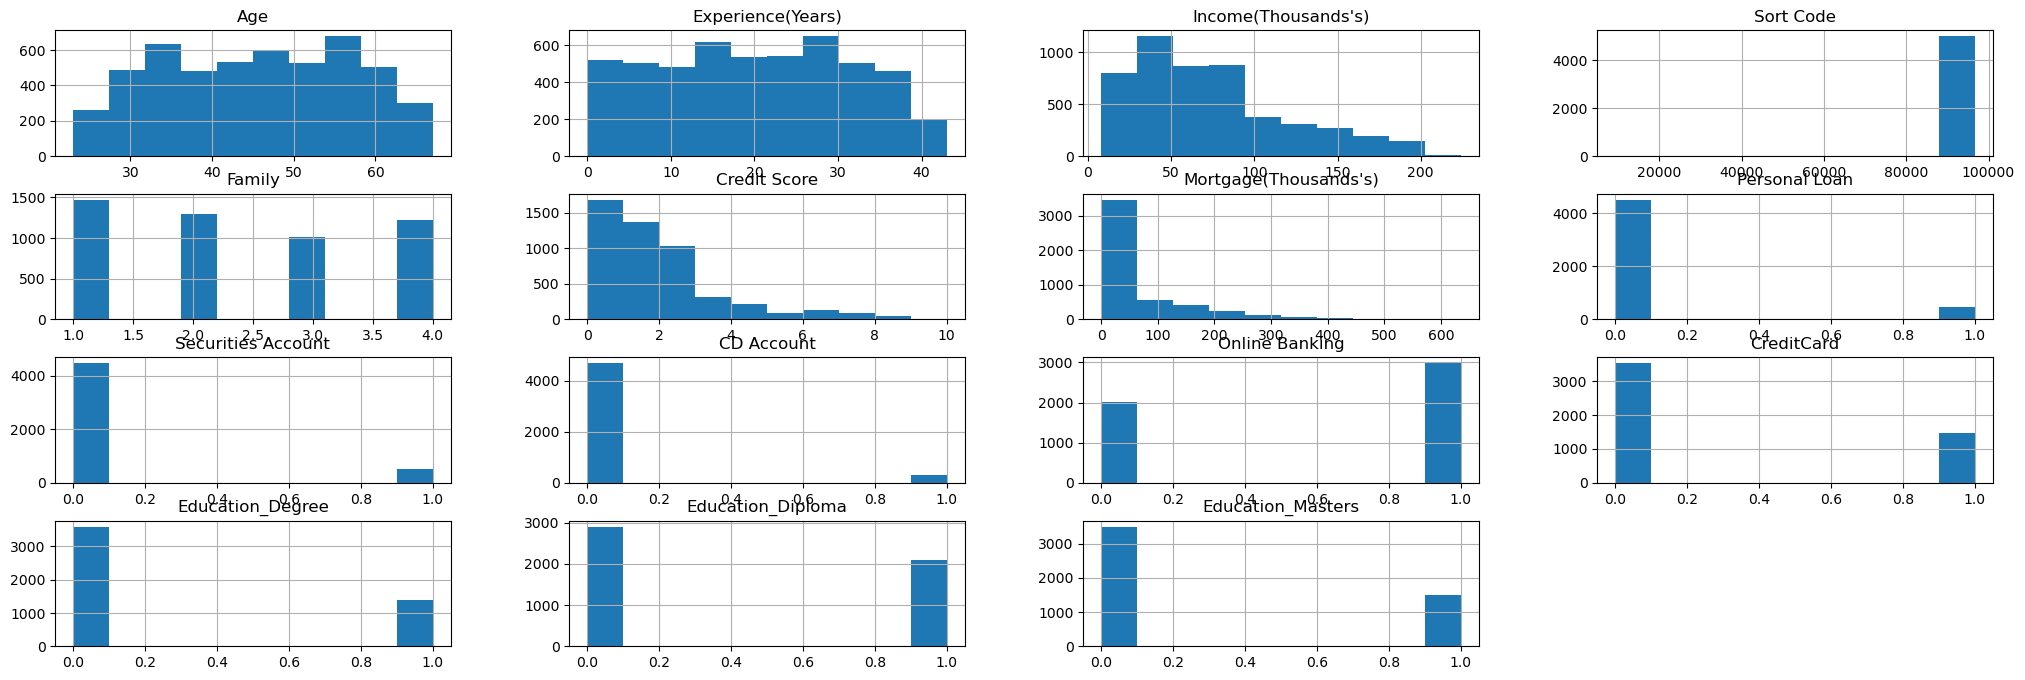

In [12]:
data.hist(figsize=(25,8));

* 80.77 with no logs
* 80.80 with log on mortgage and credit score
* 81.42 with log on mort, credit and sort code

In [13]:
data["Mortgage(Thousands's)"] = np.log1p(data["Mortgage(Thousands's)"])
data["Credit Score"] = np.log1p(data["Credit Score"])
data["Sort Code"] = np.log1p(data["Sort Code"])

In [14]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared
evals = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [15]:
X = data.drop("Income(Thousands's)", axis=1)
y = data["Income(Thousands's)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=10)

fs.fit_transform(X_train, y_train)
cols_from_k=X_train.columns[fs.get_support(indices=True)]

X_train = X_train[cols_from_k]
X_test = X_test[cols_from_k]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [18]:
regressor = RandomForestRegressor()
regressor.fit(X_train_s, y_train)

y_pred_reg = regressor.predict(X_test_s)

In [19]:
mae_reg, mse, rmse, r_squared_reg = evaluation(y_test, y_pred_reg)
print("MAE:", mae_reg)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared_reg)
print("-"*30)

MAE: 13.502905032467533
MSE: 366.0287959885079
RMSE: 19.131879050122283
R2 Score: 0.8273873217444809
------------------------------


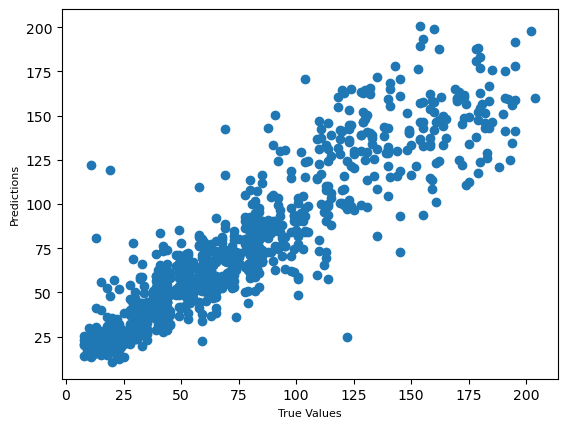

In [20]:
plt.scatter(y_test, y_pred_reg)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.show()

In [21]:
new_row = {"Model": "Random Forest","MAE": mae_reg, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared_reg}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_43324\3735654929.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)


In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_s, y_train)

best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train_s, y_train)

y_pred_hpt = best_regressor.predict(X_test_s)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [23]:
mae_hpt, mse, rmse, r_squared_hpt = evaluation(y_test, y_pred_hpt)
print("MAE:", mae_hpt)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared_hpt)
print("-"*30)

MAE: 13.399007473415473
MSE: 355.9163434286714
RMSE: 18.865745239154254
R2 Score: 0.8321561747396975
------------------------------


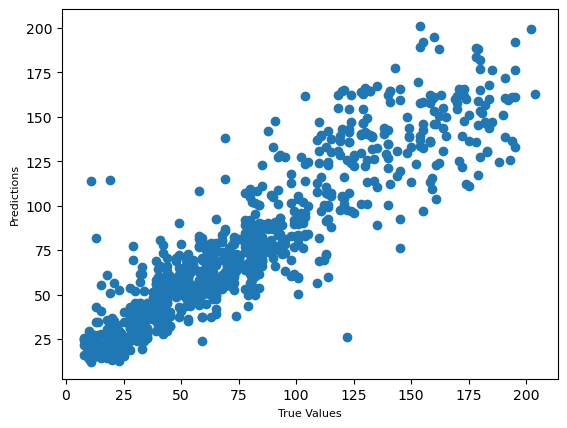

In [24]:
plt.scatter(y_test, y_pred_hpt)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.show()

In [25]:
new_row = {"Model": "Random Forest - HPT","MAE": mae_hpt, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared_hpt}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 

model = Sequential() 
model.add(Dense(120, activation='relu', 
kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear')) 
#opt = SGD(learning_rate=1.0, momentum=0.6) 
opt = Adam()
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, 
metrics=['mse']) 
# fit model 
model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), 
epochs=300, verbose=0) 

In [27]:
y_pred_nn = model.predict(X_test_s)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
mae_nn, mse, rmse, r_squared_nn = evaluation(y_test, y_pred_nn)
print("MAE:", mae_nn)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared_nn)
print("-"*30)

MAE: 19.89209677886963
MSE: 714.6218287339963
RMSE: 26.732411577222063
R2 Score: 0.6629970397151355
------------------------------


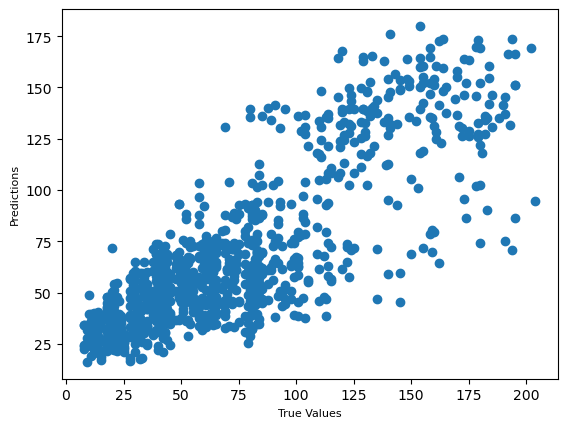

In [29]:
plt.scatter(y_test, y_pred_nn)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.show()

In [30]:
new_row = {"Model": "Neural Net - Baseline","MAE": mae_nn, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared_nn}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [31]:
model = Sequential() 
model.add(Dense(200, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear')) 

#opt = SGD(learning_rate=1.0, momentum=0.6) 
opt = Adam()

model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse']) 

# fit model 
model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), 
epochs=300, verbose=0) 

In [32]:
y_pred_nn = model.predict(X_test_s)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


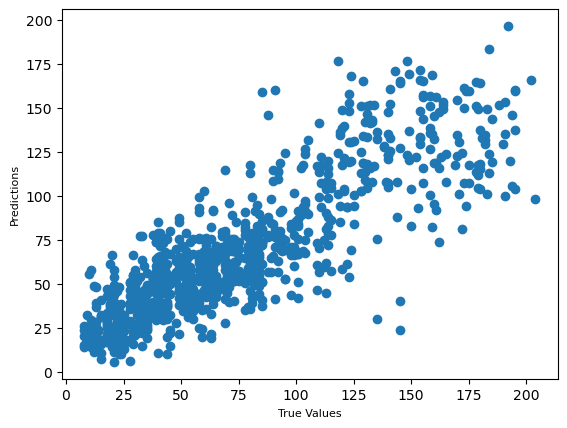

In [33]:
plt.scatter(y_test, y_pred_nn)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.show()

In [34]:
mae_nn, mse, rmse, r_squared_nn = evaluation(y_test, y_pred_nn)
print("MAE:", mae_nn)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared_nn)
print("-"*30)

MAE: 18.116929710388185
MSE: 621.9129920271432
RMSE: 24.938183414738596
R2 Score: 0.7067168802776957
------------------------------


In [35]:
new_row = {"Model": "Neural Net - Deep","MAE": mae_nn, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared_nn}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [36]:
model = Sequential() 
model.add(Dense(200, activation='relu',kernel_initializer='he_uniform')) 
model.add(Dense(1, activation='linear')) 

#opt = SGD(learning_rate=1.0, momentum=0.6) 
#opt = Adam(learning_rate= 0.006)
opt = Adam()

model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse']) 

# fit model 
model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), 
epochs=300, verbose=0) 

In [37]:
y_pred_nnw = model.predict(X_test_s)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


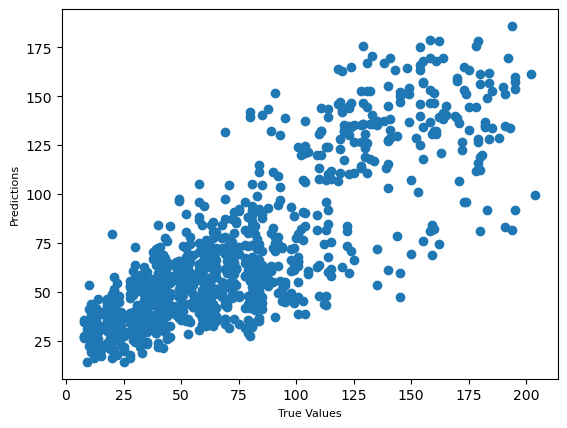

In [38]:
plt.scatter(y_test, y_pred_nnw)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.show()

In [39]:
mae_nn, mse, rmse, r_squared_nn = evaluation(y_test, y_pred_nnw)
print("MAE:", mae_nn)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared_nn)
print("-"*30)

MAE: 19.837319684028625
MSE: 693.9423101160667
RMSE: 26.34278478285974
R2 Score: 0.672749133355844
------------------------------


In [40]:
new_row = {"Model": "Neural Net - Wide","MAE": mae_nn, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared_nn}
evals = pd.concat([evals, pd.DataFrame([new_row])], ignore_index=True)

In [41]:
evals.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
1,Random Forest - HPT,13.399007,355.916343,18.865745,0.832156
0,Random Forest,13.502905,366.028796,19.131879,0.827387
3,Neural Net - Deep,18.116930,621.912992,24.938183,0.706717
4,Neural Net - Wide,19.837320,693.942310,26.342785,0.672749
2,Neural Net - Baseline,19.892097,714.621829,26.732412,0.662997
